___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% ! important; }<style>"))

# WELCOME!

Welcome to "***Clustering (Customer Segmentation) Project***". This is the last medium project of ***Machine Learning*** course.

At the end of this project, you will have performed ***Cluster Analysis*** with an ***Unsupervised Learning*** method.

---

In this project, customers are required to be segmented according to the purchasing history obtained from the membership cards of a big mall.

This project is less challenging than other projects. After getting to know the data set quickly, you are expected to perform ***Exploratory Data Analysis***. You should observe the distribution of customers according to different variables, also discover relationships and correlations between variables. Then you will spesify the different variables to use for cluster analysis.

The last step in customer segmentation is to group the customers into distinct clusters based on their characteristics and behaviors. One of the most common methods for clustering is ***K-Means Clustering***, which partitions the data into k clusters based on the distance to the cluster centroids. Other clustering methods include ***hierarchical clustering***, density-based clustering, and spectral clustering. Each cluster can be assigned a label that describes its main features and preferences.

- ***NOTE:*** *This project assumes that you already know the basics of coding in Python. You should also be familiar with the theory behind Cluster Analysis and scikit-learn module as well as Machine Learning before you begin.*

---
---

# #Tasks

Mentoring Prep. and self study####

#### 1. Import Libraries, Load Dataset, Exploring Data
- Import Libraries
- Load Dataset
- Explore Data

#### 2. Exploratory Data Analysis (EDA)


#### 3. Cluster Analysis

- Clustering based on Age and Spending Score

    *i. Create a new dataset with two variables of your choice*
    
    *ii. Determine optimal number of clusters*
    
    *iii. Apply K Means*
    
    *iv. Visualizing and Labeling All the Clusters*
    
    
- Clustering based on Annual Income and Spending Score

    *i. Create a new dataset with two variables of your choice*
    
    *ii. Determine optimal number of clusters*
    
    *iii. Apply K Means*
    
    *iv. Visualizing and Labeling All the Clusters*
    
    
- Hierarchical Clustering

    *i. Determine optimal number of clusters using Dendogram*

    *ii. Apply Agglomerative Clustering*

    *iii. Visualizing and Labeling All the Clusters*

- Conclusion

---
---

## 1. Import Libraries, Load Dataset, Exploring Data

There is a big mall in a specific city that keeps information of its customers who subscribe to a membership card. In the membetrship card they provide following information : gender, age and annula income. The customers use this membership card to make all the purchases in the mall, so tha mall has the purchase history of all subscribed members and according to that they compute the spending score of all customers. You have to segment these customers based on the details given.

#### Import Libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams["figure.figsize"] = (7,4)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
#pd.set_option('display.float_format', lambda x: '%.3f' % x)


#### Load Dataset

In [3]:
df = pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


#### Explore Data

You can rename columns to more usable, if you need.

In [4]:
# since its hard to call coulumns we have to change thier names
df.rename(columns={"Annual Income (k$)":"Annual_Income", "Spending Score (1-100)":"Spending_Score"}, inplace=True)

In [5]:
df.describe()

,CustomerID,Age,Annual_Income,Spending_Score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


<AxesSubplot:>

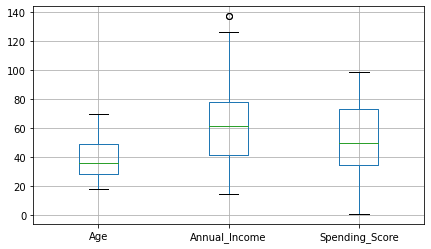

In [6]:
# from both describe and boxplot we could notice there are no outliers
df.boxplot(['Age','Annual_Income','Spending_Score'])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   CustomerID      200 non-null    int64 
 1   Gender          200 non-null    object
 2   Age             200 non-null    int64 
 3   Annual_Income   200 non-null    int64 
 4   Spending_Score  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


---
---

## 2. Exploratory Data Analysis (EDA)

After performing Cluster Analysis, you need to know the data well in order to label the observations correctly. Analyze frequency distributions of features, relationships and correlations between the independent variables and the dependent variable. It is recommended to apply data visualization techniques. Observing breakpoints helps you to internalize the data.





In [8]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual_Income', 'Spending_Score'], dtype='object')

In [9]:
# drop customer ID since it is not meangful 
df.drop(columns="CustomerID", inplace=True)

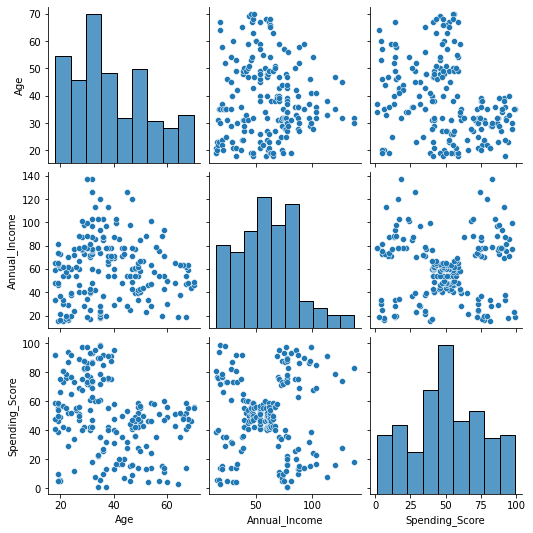

In [10]:
sns.pairplot(df);

In [11]:
df.nunique()

Gender             2
Age               51
Annual_Income     64
Spending_Score    84
dtype: int64

<AxesSubplot:xlabel='Gender', ylabel='count'>

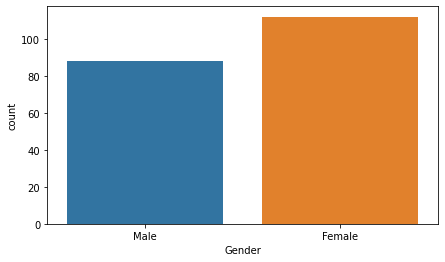

In [12]:
#here we notice that female take the majority 
sns.countplot(x=df.Gender)

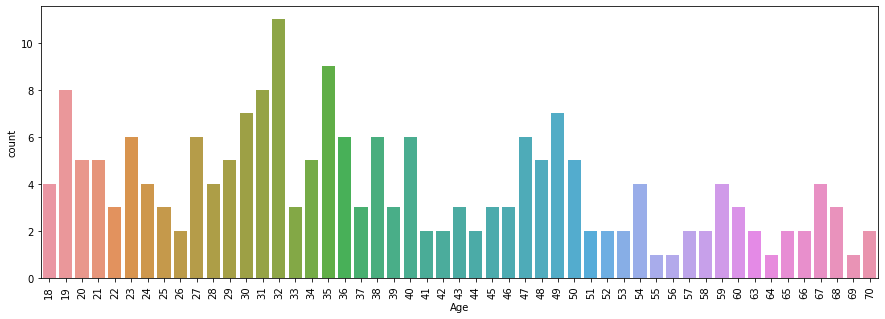

In [13]:
#people from 19 to 50 or 40 make the majority
plt.figure(figsize=(15,5))
ax = sns.countplot(x=df.Age)

plt.xticks(rotation=90);

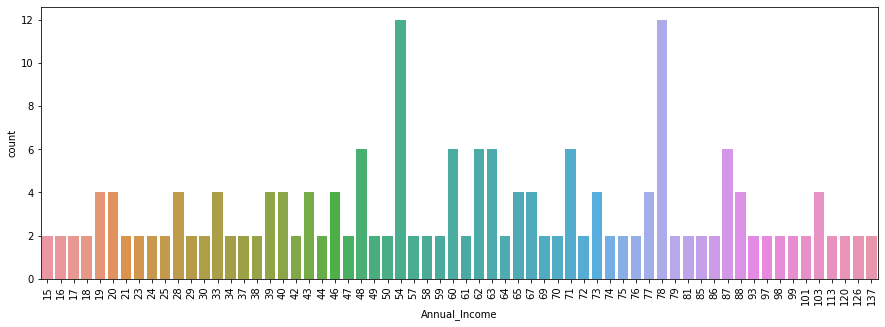

In [14]:

plt.figure(figsize=(15,5))
ax = sns.countplot(x=df.Annual_Income)

plt.xticks(rotation=90);

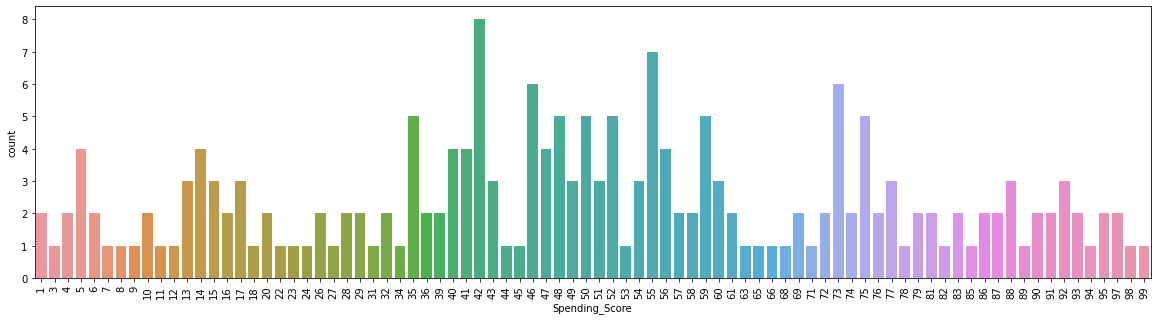

In [15]:
plt.figure(figsize=(20,5))
ax = sns.countplot(x=df.Spending_Score)

plt.xticks(rotation=90);

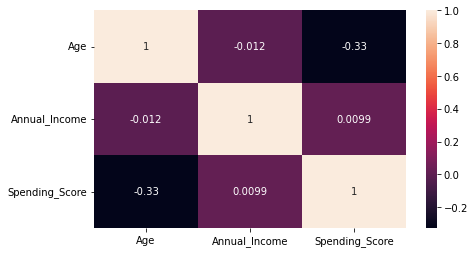

In [16]:
sns.heatmap(df.corr(), annot=True);

---
---

## 3. Cluster Analysis

The purpose of the project is to perform cluster analysis using [K-Means](https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1) and [Hierarchical Clustering](https://medium.com/analytics-vidhya/hierarchical-clustering-d2d92835280c) algorithms.
Using a maximum of two variables for each analysis can help to identify cluster labels more clearly.
The K-Means algorithm requires determining the number of clusters using the [Elbow Method](https://en.wikipedia.org/wiki/Elbow_method_(clustering), while Hierarchical Clustering builds a dendrogram without defining the number of clusters beforehand. Different labeling should be done based on the information obtained from each analysis.
Labeling example:

- **Normal Customers**  -- An Average consumer in terms of spending and Annual Income
- **Spender Customers** --  Annual Income is less but spending high, so can also be treated as potential target customer.

In [17]:
# function to compute hopkins's statistic for the dataframe X
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
def hopkins(X, ratio=0.05):

    if not isinstance(X, np.ndarray):
      X = X.values  #convert dataframe to a numpy array
    sample_size = int(X.shape[0] * ratio) #0.05 (5%) based on paper by Lawson and Jures

    #a uniform random sample in the original data space
    X_uniform_random_sample = uniform(X.min(axis=0), X.max(axis=0) ,(sample_size , X.shape[1]))

    #a random sample of size sample_size from the original data X
    random_indices=sample(range(0, X.shape[0], 1), sample_size)
    X_sample = X[random_indices]

    #initialise unsupervised learner for implementing neighbor searches
    neigh = NearestNeighbors(n_neighbors=2)
    nbrs=neigh.fit(X)

    #u_distances = nearest neighbour distances from uniform random sample
    u_distances , u_indices = nbrs.kneighbors(X_uniform_random_sample , n_neighbors=2)
    u_distances = u_distances[: , 0] #distance to the first (nearest) neighbour

    #w_distances = nearest neighbour distances from a sample of points from original data X
    w_distances , w_indices = nbrs.kneighbors(X_sample , n_neighbors=2)
    #distance to the second nearest neighbour (as the first neighbour will be the point itself, with distance = 0)
    w_distances = w_distances[: , 1]

    u_sum = np.sum(u_distances)
    w_sum = np.sum(w_distances)

    #compute and return hopkins' statistic
    H = u_sum/ (u_sum + w_sum)
    return H

In [18]:
df_km= df.drop(columns="Gender") 

In [19]:
# hopkins : A statistical method that measures data clustering tendency.
# More than 0.5 is prone to clustering.
hopkins(df_km, 1)

0.7019995108082309

### Clustering based on Age and Spending Score

#### *i. Create a new dataset with two variables of your choice*

In [20]:
df_1 = df.loc[:,["Age","Spending_Score"]]

In [21]:
hopkins(df_1, 1)

0.6840572183857162

#### *ii. Determine optimal number of clusters*

In [22]:
# using the elbow method
from sklearn.cluster import KMeans
ssd = []

K = range(2,10)

for k in K:
    model = KMeans(n_clusters =k,
                   random_state=42)
    model.fit(df_1)
    ssd.append(model.inertia_)

Text(0.5, 1.0, 'elbow method')

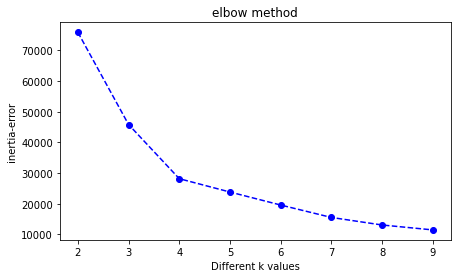

In [23]:
plt.plot(K, ssd, "bo--")
plt.xlabel("Different k values")
plt.ylabel("inertia-error")
plt.title("elbow method")

In [24]:
ssd

[75949.15601023019,
 45840.67661610867,
 28165.58356662934,
 23811.52352472089,
 19566.522341377608,
 15514.193134351035,
 13055.626865965576,
 11453.288911292719]

In [25]:
# into a new dataframe we save the diffrent in ssd to plot it
df_ssd =pd.DataFrame(-pd.Series(ssd).diff()).rename(index = lambda x : x+1)
df_ssd

,0
1,NaN
2,30108.479394
3,17675.093049
4,4354.060042
5,4245.001183
6,4052.329207
7,2458.566268
8,1602.337955


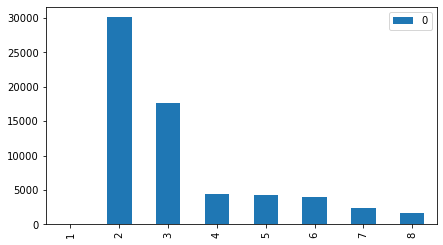

In [26]:
df_ssd.plot(kind='bar');

### Why silhouette_score is negative?

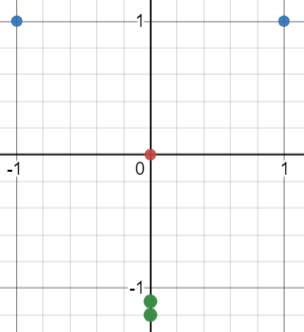

In [27]:
from sklearn.metrics import silhouette_score
# silhouette_score ; It is a metric that measures the quality of our clustering.
# When calculating, both inter cluster distance and intra cluster distance are taken into account.
# ranges -1 to 1, bad to good respectively.
range_n_clusters = range(2,9)
for num_clusters in range_n_clusters:
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters,
                    random_state=42)
    kmeans.fit(df_1)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(df_1, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")
# in 4 clusters is the better result

For n_clusters=2, the silhouette score is 0.4692341232501655
For n_clusters=3, the silhouette score is 0.45300127016521263
For n_clusters=4, the silhouette score is 0.49973941540141753
For n_clusters=5, the silhouette score is 0.44526667994351227
For n_clusters=6, the silhouette score is 0.44845919861907363
For n_clusters=7, the silhouette score is 0.42313509747504796
For n_clusters=8, the silhouette score is 0.4280182657184854


#### *iii. Apply K Means*

In [28]:
kmeans = KMeans(n_clusters=4, random_state=42)

In [29]:
kmeans.fit_predict(df_1)

array([3, 1, 2, 1, 3, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 3, 3, 2, 1, 3, 1,
       2, 1, 2, 1, 2, 3, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 0, 3,
       2, 3, 0, 3, 3, 3, 0, 3, 3, 0, 0, 0, 0, 0, 3, 0, 0, 3, 0, 0, 0, 3,
       0, 0, 3, 3, 0, 0, 0, 0, 0, 3, 0, 3, 3, 0, 0, 3, 0, 0, 3, 0, 0, 3,
       3, 0, 0, 3, 0, 3, 3, 3, 0, 3, 0, 3, 3, 0, 0, 3, 0, 3, 0, 0, 0, 0,
       0, 3, 3, 3, 3, 3, 0, 0, 0, 0, 3, 3, 3, 1, 3, 1, 0, 1, 2, 1, 2, 1,
       3, 1, 2, 1, 2, 1, 2, 1, 2, 1, 3, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 3, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 3, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1])

#### *iv. Visualizing and Labeling All the Clusters*

In [30]:
df_1["cluster_km_num"] = kmeans.fit_predict(df_1)
df_1

,Age,Spending_Score,cluster_km_num
0,19,39,3
1,21,81,1
2,20,6,2
3,23,77,1
4,31,40,3
...,...,...,...
195,35,79,1
196,45,28,2
197,32,74,1
198,32,18,2


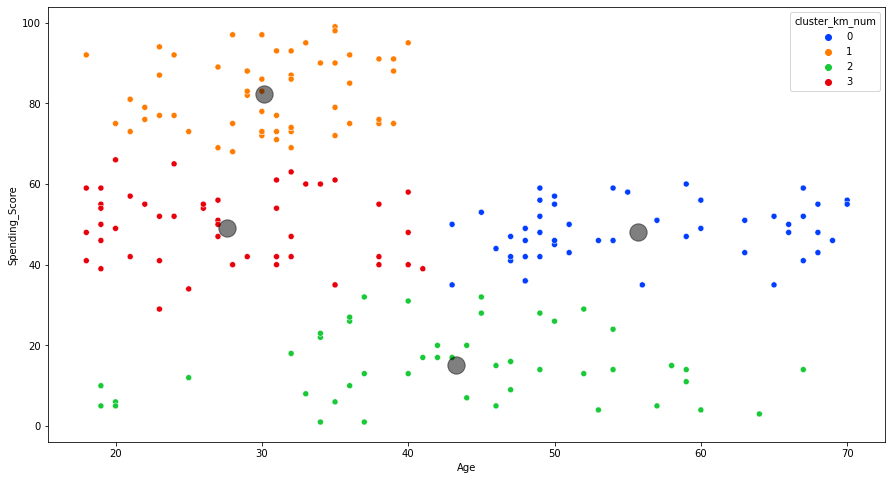

In [31]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='Age', y='Spending_Score', hue='cluster_km_num', data=df_1, palette="bright")
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=300, alpha=0.5);

### Clustering based on Annual Income and Spending Score

#### *i. Create a new dataset with two variables of your choice*

In [32]:
df_2 = df.loc[:,["Annual_Income", "Spending_Score"]]

In [33]:
hopkins(df_2, 1)

0.7048088131019881

#### *ii. Determine optimal number of clusters*

In [34]:
# using the elbow method
from sklearn.cluster import KMeans
ssd1 = []

K = range(2,10)

for k in K:
    model = KMeans(n_clusters =k,
                   random_state=42)
    model.fit(df_2)
    ssd1.append(model.inertia_)

Text(0.5, 1.0, 'elbow method')

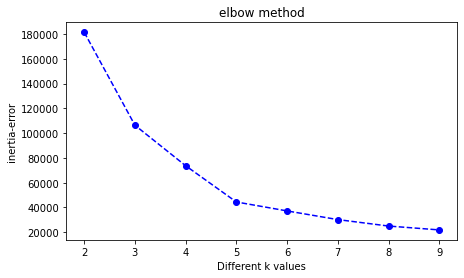

In [35]:
plt.plot(K, ssd1, "bo--")
plt.xlabel("Different k values")
plt.ylabel("inertia-error")
plt.title("elbow method")

In [36]:
ssd1

[181363.59595959596,
 106348.37306211119,
 73679.78903948834,
 44448.45544793371,
 37233.81451071001,
 30241.343617936585,
 25036.417604033984,
 21916.794789843727]

In [37]:
# into a new dataframe we save the diffrent in ssd to plot it
df_ssd1 =pd.DataFrame(-pd.Series(ssd1).diff()).rename(index = lambda x : x+1)
df_ssd1

,0
1,NaN
2,75015.222897
3,32668.584023
4,29231.333592
5,7214.640937
6,6992.470893
7,5204.926014
8,3119.622814


<AxesSubplot:>

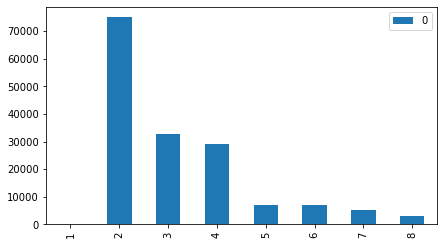

In [38]:
df_ssd1.plot(kind='bar')

In [39]:
range_n_clusters = range(2,9)
for num_clusters in range_n_clusters:
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters,
                    random_state=42)
    kmeans.fit(df_2)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(df_2, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")
# in 4 clusters is the better result

For n_clusters=2, the silhouette score is 0.2968969162503008
For n_clusters=3, the silhouette score is 0.46761358158775435
For n_clusters=4, the silhouette score is 0.4931963109249047
For n_clusters=5, the silhouette score is 0.553931997444648
For n_clusters=6, the silhouette score is 0.53976103063432
For n_clusters=7, the silhouette score is 0.5288104473798049
For n_clusters=8, the silhouette score is 0.45481197931195283


#### *iii. Apply K Means*

In [40]:
kmeans = KMeans(n_clusters=5, random_state=42)

In [41]:
kmeans.fit_predict(df_2)

array([4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 0,
       4, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 1, 0, 1, 3, 1, 3, 1,
       0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1])

#### *iv. Visualizing and Labeling All the Clusters*

In [42]:
df_2["cluster_km_num"] = kmeans.fit_predict(df_2)
df_2

,Annual_Income,Spending_Score,cluster_km_num
0,15,39,4
1,15,81,2
2,16,6,4
3,16,77,2
4,17,40,4
...,...,...,...
195,120,79,1
196,126,28,3
197,126,74,1
198,137,18,3


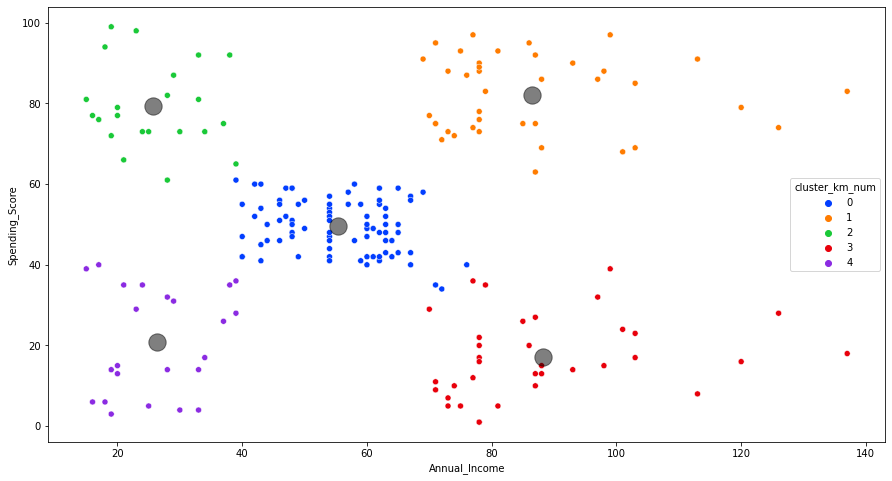

In [43]:
plt.figure(figsize=(15,8))
sns.scatterplot(x="Annual_Income", y="Spending_Score", hue='cluster_km_num', data=df_2, palette="bright")
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=300, alpha=0.5);

### Hierarchical Clustering

### *i. Determine optimal number of clusters using Dendogram*

In [44]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [45]:
from sklearn.cluster import AgglomerativeClustering

In [46]:
from sklearn.metrics import silhouette_score

### Clustering based on Age and Spending Score- x1

In [47]:
hc_ward = linkage(y=df_1, method="ward")
hc_complete = linkage(df_1, "complete")
hc_average = linkage(df_1, "average")
hc_single = linkage(df_1, "single")

{'icoord': [[5.0, 5.0, 15.0, 15.0],
  [45.0, 45.0, 55.0, 55.0],
  [85.0, 85.0, 95.0, 95.0],
  [75.0, 75.0, 90.0, 90.0],
  [65.0, 65.0, 82.5, 82.5],
  [50.0, 50.0, 73.75, 73.75],
  [35.0, 35.0, 61.875, 61.875],
  [25.0, 25.0, 48.4375, 48.4375],
  [10.0, 10.0, 36.71875, 36.71875]],
 'dcoord': [[0.0, 6.324555320336759, 6.324555320336759, 0.0],
  [0.0, 6.324555320336759, 6.324555320336759, 0.0],
  [0.0, 6.324555320336759, 6.324555320336759, 0.0],
  [0.0, 6.324555320336759, 6.324555320336759, 6.324555320336759],
  [0.0, 6.708203932499369, 6.708203932499369, 6.324555320336759],
  [6.324555320336759,
   7.0710678118654755,
   7.0710678118654755,
   6.708203932499369],
  [0.0, 7.483314773547883, 7.483314773547883, 7.0710678118654755],
  [0.0, 8.0, 8.0, 7.483314773547883],
  [6.324555320336759, 8.94427190999916, 8.94427190999916, 8.0]],
 'ivl': ['144',
  '(4)',
  '10',
  '160',
  '(4)',
  '(25)',
  '(2)',
  '(59)',
  '(7)',
  '(96)'],
 'leaves': [144, 363, 10, 160, 362, 386, 385, 384, 387, 389]

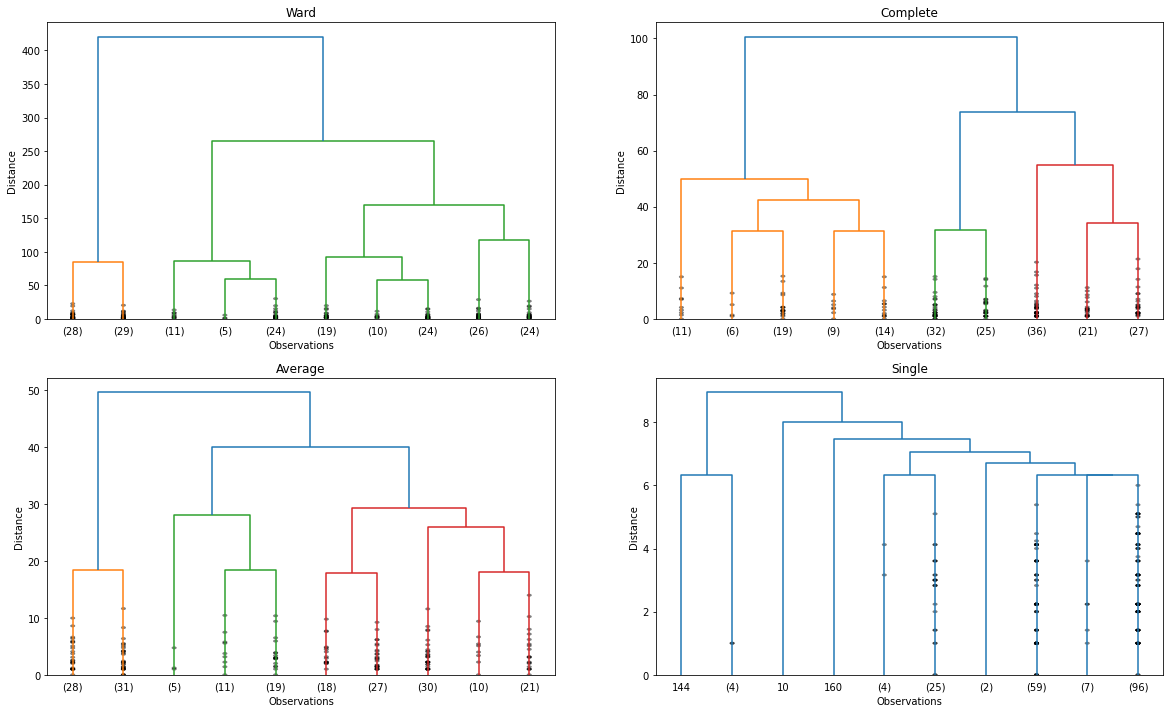

In [48]:
plt.figure(figsize = (20,12))

plt.subplot(221)
plt.title("Ward")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 10)

plt.subplot(222)
plt.title("Complete")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 10)

plt.subplot(223)
plt.title("Average")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_average, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 10)

plt.subplot(224)
plt.title("Single")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_single, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 10)

In [49]:
range_n_clusters = range(2,11)
for num_clusters in range_n_clusters:
    # intialise kmeans
    Agg_model = AgglomerativeClustering(n_clusters=num_clusters)
    Agg_model.fit(df_1)
    cluster_labels = Agg_model.labels_
    # silhouette score
    silhouette_avg = silhouette_score(df_1, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")
#same as kmeans, 4 clusters is better 

For n_clusters=2, the silhouette score is 0.45454592584148096
For n_clusters=3, the silhouette score is 0.4406245222112989
For n_clusters=4, the silhouette score is 0.4608405468661758
For n_clusters=5, the silhouette score is 0.4043739061256346
For n_clusters=6, the silhouette score is 0.4125751937244674
For n_clusters=7, the silhouette score is 0.4158018450743115
For n_clusters=8, the silhouette score is 0.3881443379710403
For n_clusters=9, the silhouette score is 0.39456163701637914
For n_clusters=10, the silhouette score is 0.388362398923104


## Clustering based on Annual Income and Spending Score- x2

In [50]:
hc_ward = linkage(y = df_2, method = "ward")
hc_complete = linkage(df_2, "complete")
hc_average = linkage(df_2, "average")
hc_single = linkage(df_2, "single")

{'icoord': [[35.0, 35.0, 45.0, 45.0],
  [65.0, 65.0, 75.0, 75.0],
  [55.0, 55.0, 70.0, 70.0],
  [40.0, 40.0, 62.5, 62.5],
  [85.0, 85.0, 95.0, 95.0],
  [51.25, 51.25, 90.0, 90.0],
  [25.0, 25.0, 70.625, 70.625],
  [15.0, 15.0, 47.8125, 47.8125],
  [5.0, 5.0, 31.40625, 31.40625]],
 'dcoord': [[0.0, 11.661903789690601, 11.661903789690601, 0.0],
  [0.0, 11.661903789690601, 11.661903789690601, 0.0],
  [0.0, 13.038404810405298, 13.038404810405298, 11.661903789690601],
  [11.661903789690601,
   13.379088160259652,
   13.379088160259652,
   13.038404810405298],
  [0.0, 13.416407864998739, 13.416407864998739, 0.0],
  [13.379088160259652,
   13.45362404707371,
   13.45362404707371,
   13.416407864998739],
  [0.0, 13.892443989449804, 13.892443989449804, 13.45362404707371],
  [0.0, 14.212670403551895, 14.212670403551895, 13.892443989449804],
  [0.0, 14.866068747318506, 14.866068747318506, 14.212670403551895]],
 'ivl': ['198',
  '199',
  '(2)',
  '(3)',
  '(154)',
  '(2)',
  '193',
  '(33)',
  '19

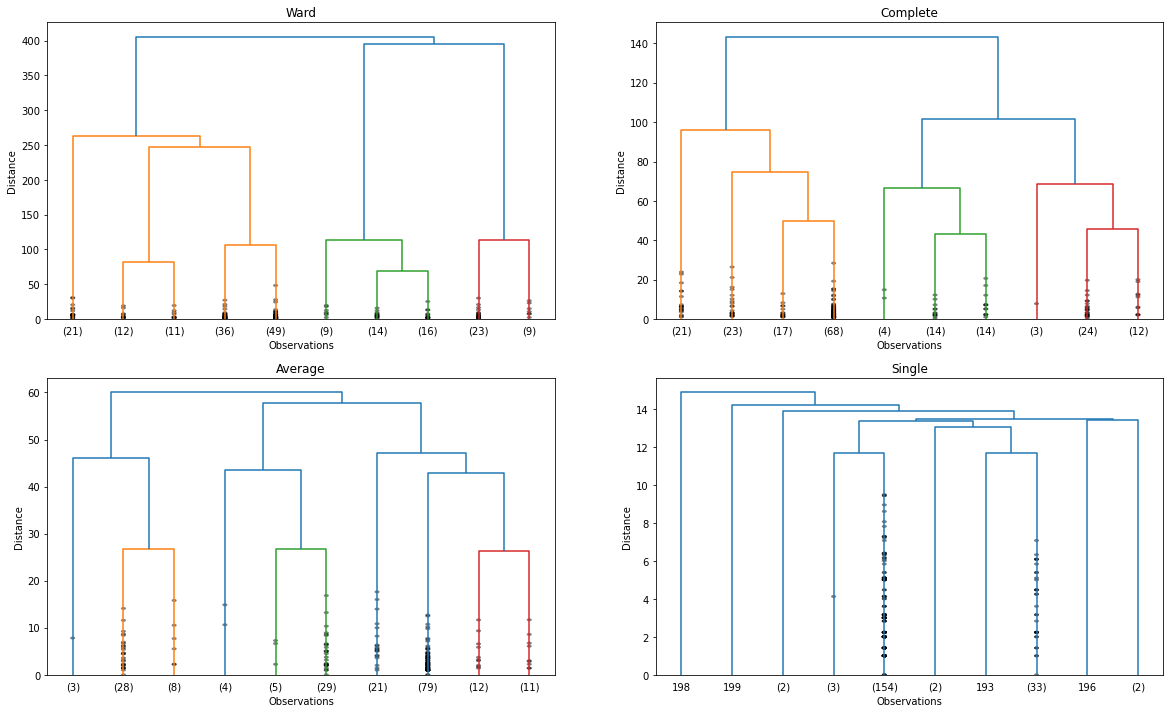

In [51]:
plt.figure(figsize = (20,12))

plt.subplot(221)
plt.title("Ward")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 10)

plt.subplot(222)
plt.title("Complete")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 10)

plt.subplot(223)
plt.title("Average")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_average, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 10)

plt.subplot(224)
plt.title("Single")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_single, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 10)

In [52]:
range_n_clusters = range(2,11)
for num_clusters in range_n_clusters:
    # intialise kmeans
    Agg_model = AgglomerativeClustering(n_clusters=num_clusters)
    Agg_model.fit(df_2)
    cluster_labels = Agg_model.labels_
    # silhouette score
    silhouette_avg = silhouette_score(df_2, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")
#same as kmeans, 5 clusters is better

For n_clusters=2, the silhouette score is 0.36670646297521314
For n_clusters=3, the silhouette score is 0.46143086477646994
For n_clusters=4, the silhouette score is 0.491312811099761
For n_clusters=5, the silhouette score is 0.554020280939098
For n_clusters=6, the silhouette score is 0.5389731107100326
For n_clusters=7, the silhouette score is 0.5207937874273341
For n_clusters=8, the silhouette score is 0.4331336323243057
For n_clusters=9, the silhouette score is 0.4394698104182007
For n_clusters=10, the silhouette score is 0.4347953869041223


### ii. *Apply Agglomerative Clustering*

#### Age and Spending Score- x1

In [53]:
Agg_c1 = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
y_agg1= Agg_c1.fit_predict(df_1)

In [54]:
df_1['cluster_Agg_num'] = y_agg1
df_1.head()

,Age,Spending_Score,cluster_km_num,cluster_Agg_num
0,19,39,3,0
1,21,81,1,3
2,20,6,2,2
3,23,77,1,3
4,31,40,3,0


#### Annual Income and Spending Score- x2

In [55]:
Agg_c2 = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
y_agg2= Agg_c2.fit_predict(df_2)

In [56]:
df_2['cluster_Agg_num'] = y_agg2
df_2.head()

,Annual_Income,Spending_Score,cluster_km_num,cluster_Agg_num
0,15,39,4,4
1,15,81,2,3
2,16,6,4,4
3,16,77,2,3
4,17,40,4,4


### iii. *Visualizing and Labeling All the Clusters*

#### Age and Spending Score- x1

<AxesSubplot:xlabel='Age', ylabel='Spending_Score'>

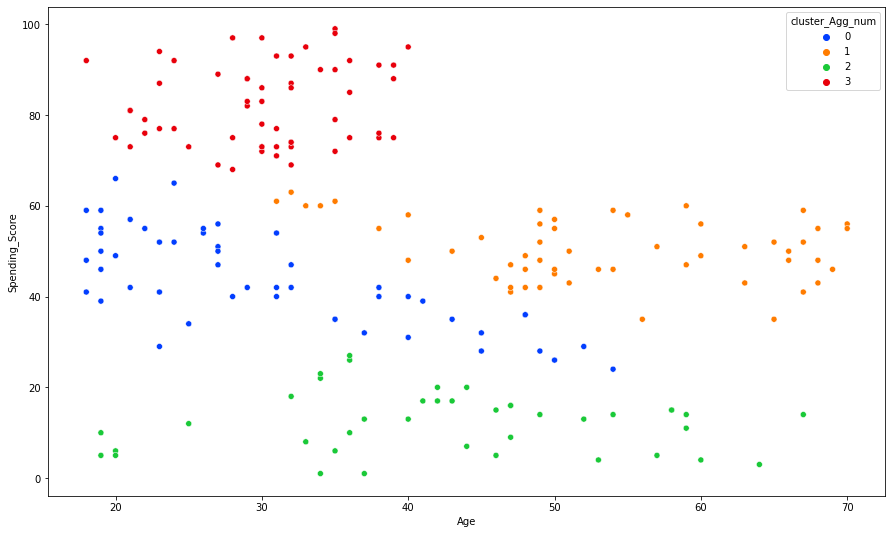

In [57]:
plt.figure(figsize=(15,9))
sns.scatterplot(x='Age', y='Spending_Score', hue='cluster_Agg_num', data=df_1, palette="bright")
#kmeans perform better clustering 0, 2 and 3

#### Annual Income and Spending Score- x2

<AxesSubplot:xlabel='Annual_Income', ylabel='Spending_Score'>

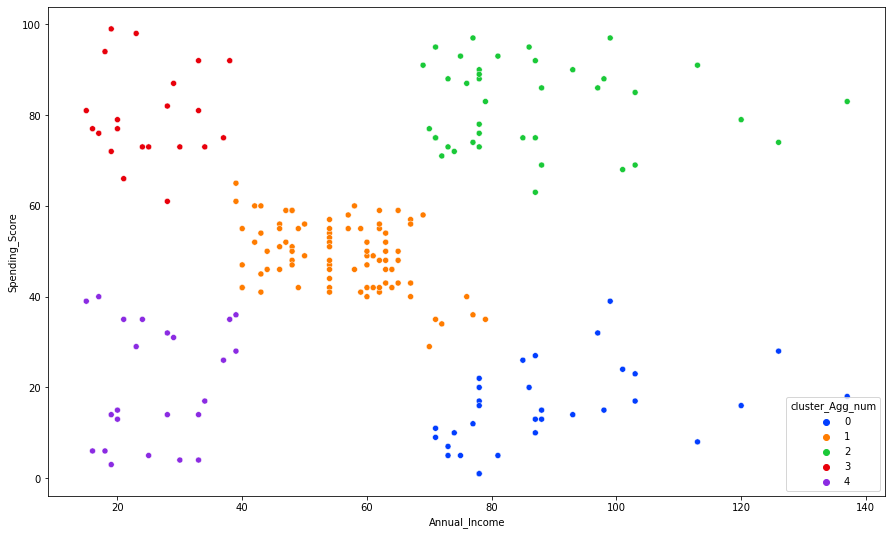

In [58]:
plt.figure(figsize=(15,9))
sns.scatterplot(x='Annual_Income', y='Spending_Score', hue='cluster_Agg_num', data=df_2, palette="bright")
#kmeans and Agglomerative give same result

### Conclusion

**cluster 0** : The average age is around 55, both annula_income and spending_scores are on average.
It should be researched what can be done to direct to more spending.

**cluster 1**: The average age is around 45, the annula_income is high but the spending_scores are very low.
This group is our target audience and specific strategies should be developed to drive this group to spend.

**cluster 2** :The average age is around 30. The annula_income is high and spending_scores are very high.
This group consists of our loyal customers. Our company derives the main profit from this group. Very
special promotions can be made in order not to miss it.    
    
**cluster 3**: The average age is around 25.both annula_income and spending_scores are on average.
It should be researched what can be done to direct to more spending.

#### Interpretation based on Age and Spending Score- x1

In [59]:
# only for kmeans since it performed better
df["cluster_Age_Spending_Score"] = df_1.cluster_km_num
df.head()

,Gender,Age,Annual_Income,Spending_Score,cluster_Age_Spending_Score
0,Male,19,15,39,3
1,Male,21,15,81,1
2,Female,20,16,6,2
3,Female,23,16,77,1
4,Female,31,17,40,3


In [60]:
# intereption, Age from 20 to 40 have a high spending score, 
# for cluster 1 which have highest score, the score of spending is approximately between 60 to 100, and the age is 20 to 40
# we could say even though there are high spending score for the age from 20 to 40, there are as well other people groups in the same age range but with low spending score 
# Kmeans was better then Agglomerative 

#### Interpretation based on Annual Income and Spending Score- x2

In [61]:
df["cluster_AnnIncom_Spending_Score"] = df_2.cluster_km_num
df.head()

,Gender,Age,Annual_Income,Spending_Score,cluster_Age_Spending_Score,cluster_AnnIncom_Spending_Score
0,Male,19,15,39,3,4
1,Male,21,15,81,1,2
2,Female,20,16,6,2,4
3,Female,23,16,77,1,2
4,Female,31,17,40,3,4


In [62]:
# intereption in the Income range from 10 to 40, there are two groups one having a high spending score while the other is lower which are cluster 2 and 4, 
# same for income range from 50 to 140 which are cluster 1 and 3,
# but for the income range from 40 to 70 they behaving same way for the spending score 
# it is hard to give a clear and direct labels, but we could say people with an income 10 to 40 their avg spending score is 50, and the maximum score would be 100 
# Both kmeans and Agglomerative have kinda same result

## Conclusion

### Female

**cluster 0** : The average age is around 40, both annula_income and spending_scores are on average.
It should be researched what can be done to direct more spending.

**cluster 1**: The average age is around 45, the annula_income is very high but the spending_scores is low.
This group is our target audience and special strategies need to be developed for this group.    

**cluster 2** :The average age is around 45. Both annula_income and spending_scores are low. It can be
directed to shopping with gift certificates.

**cluster 3**: The average age is around 25. Low annual_incomes but very high spending scores. This
group does a lot of shopping, but they do not bring much profit.

**cluster 4**: The average age is around 30, the annual income and the spending_score
is very high. This group consists of our loyal customers. Our company derives the main profit from this group.
Very special promotions can be made in order not to miss it.

### Male

**cluster 0** : The average age is around 45, both annula_income and spending_scores are on average.
It should be researched what can be done to direct more spending.

**cluster 1**: The average age is around 40, the annula_income is very high but the spending_scores is very low.
This group is our target audience and special strategies need to be developed for this group.    

**cluster 2** :The average age is around 50. Both annula_income and spending_scores are low. It can be
directed to shopping with gift certificates.

**cluster 3**: The average age is around 25. Low annual_incomes but very high spending scores. This
group does a lot of shopping, but they do not bring much profit.

**cluster 4**: The average age is around 30, the annual income and the spending_score
is very high. This group consists of our loyal customers. Our company derives the main profit from this group.
Very special promotions can be made in order not to miss it.

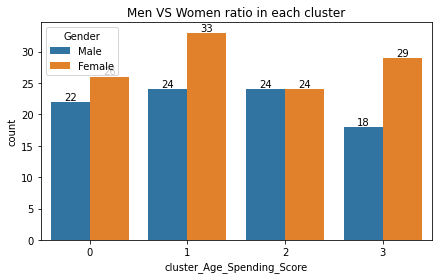

In [63]:
plt.title("Men VS Women ratio in each cluster")
plt.ylabel("Count")
ax =sns.countplot(x=df.cluster_Age_Spending_Score, hue=df.Gender)
for p in ax.containers:
    ax.bar_label(p)

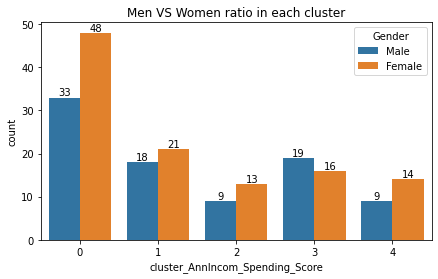

In [64]:
plt.title("Men VS Women ratio in each cluster")
plt.ylabel("Count")
ax =sns.countplot(x=df.cluster_AnnIncom_Spending_Score, hue=df.Gender)
for p in ax.containers:
    ax.bar_label(p)

**cluster 0** : The average age is around 40, both annula_income and spending_scores are on average.
It should be researched what can be done to direct more spending.

**cluster 1**: The average age is around 30, both annula_income and spending_scores are very high.
This group consists of our loyal customers. Our company derives the main profit from this group. Very
special promotions can be made in order not to miss it.

**cluster 2** :The average age is around 45. Both annula_income and spending_scores are low. It can be
directed to shopping with gift certificates.

**cluster 3**: The average age is around 25. Low annual_incomes but very high spending scores. This
group does a lot of shopping, but they do not bring much profit.

**cluster 4**: The average age is around 40, their annual income is very high but their spending_score
is very low. This group is our target audience and special strategies need to be developed for this
group.

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___